<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/FaceIdentify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
%cd /content/drive/MyDrive/Kiemtragiuaky/FaceClass

/content/drive/MyDrive/Kiemtragiuaky/FaceClass


In [6]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [7]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/Kiemtragiuaky/FaceClass/train',
                                               target_size=(30,40), batch_size=32, class_mode='categorical')

Found 1440 images belonging to 24 classes.


In [8]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Anh Kiet': 0,
 'Bao Thai': 1,
 'Bui Dang Khoa': 2,
 'Hau': 3,
 'Hoai Phong': 4,
 'Hoang Thanh': 5,
 'Hong Phuc': 6,
 'Huu Long': 7,
 'Minh Tien': 8,
 'Ngoc Hieu': 9,
 'Ngoc Minh': 10,
 'Ngoc Sang': 11,
 'Ngoc Thach': 12,
 'Nguyen Bui Anh Kiet': 13,
 'Nguyen Hoang': 14,
 'Nguyen Tuan Kiet': 15,
 'Pham Quang Huy': 16,
 'Phuc Dung': 17,
 'Quang Huy': 18,
 'Quang Phuc': 19,
 'Son Tung': 20,
 'Tan Dat': 21,
 'Tan Phat': 22,
 'Viet Ha': 23}

In [11]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(30,40,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(24,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [12]:
# Gán biến lại để vẽ đồ thị, với 50 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), 
# khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng 
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
45/45 [==============================] - 845s 19s/step - loss: 2.4432 - accuracy: 0.3472
Epoch 2/50
45/45 [==============================] - 3s 71ms/step - loss: 0.5400 - accuracy: 0.8292
Epoch 3/50
45/45 [==============================] - 4s 79ms/step - loss: 0.2216 - accuracy: 0.9479
Epoch 4/50
45/45 [==============================] - 3s 72ms/step - loss: 0.1588 - accuracy: 0.9556
Epoch 5/50
45/45 [==============================] - 3s 69ms/step - loss: 0.1134 - accuracy: 0.9722
Epoch 6/50
45/45 [==============================] - 3s 68ms/step - loss: 0.1116 - accuracy: 0.9688
Epoch 7/50
45/45 [==============================] - 4s 79ms/step - loss: 0.0772 - accuracy: 0.9806
Epoch 8/50
45/45 [==============================] - 3s 76ms/step - loss: 0.0580 - accuracy: 0.9868
Epoch 9/50
45/45 [==============================] - 3s 70ms/step - loss: 0.0532 - accuracy: 0.9868
Epoch 10/50
45/45 [==============================] - 3s 70ms/step - loss: 0.0323 - accuracy: 0.9910
Epoch 11

In [13]:
model.save('/content/drive/MyDrive/Kiemtragiuaky/FaceClass/FaceIdentify.h5')

In [14]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.004584638401865959
Train Accuracy 0.9979166388511658


<function matplotlib.pyplot.show(close=None, block=None)>

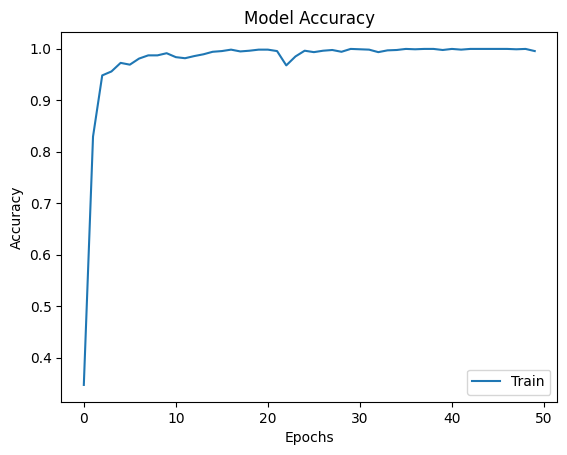

In [15]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [17]:
model1= load_model('/content/drive/MyDrive/Kiemtragiuaky/FaceClass/FaceIdentify.h5')

1/1 [==============================] - 0s 221ms/step
Quang Phuc


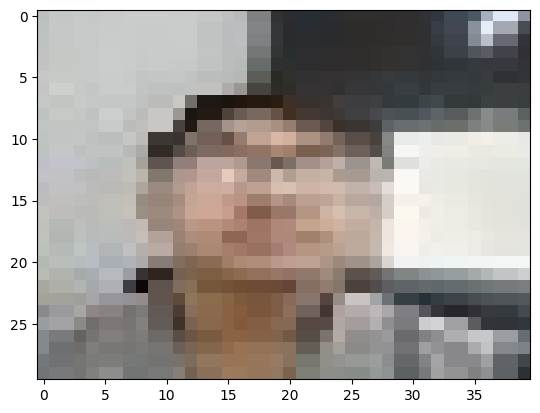

1/1 [==============================] - 0s 18ms/step
Ngoc Hieu


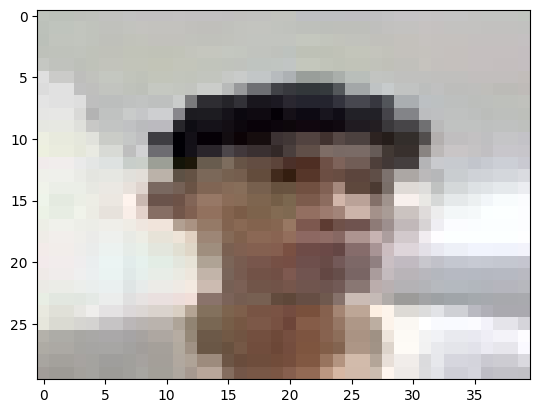

1/1 [==============================] - 0s 18ms/step
Viet Ha


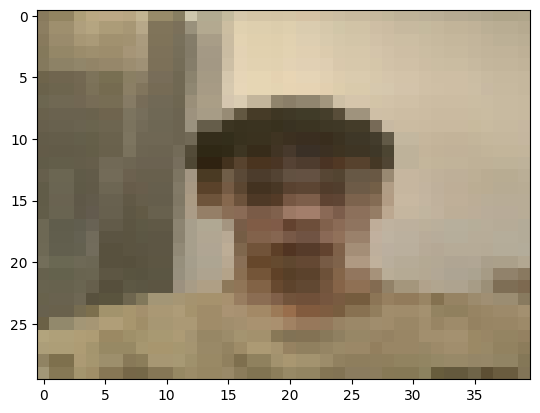

1/1 [==============================] - 0s 20ms/step
Phuc Dung


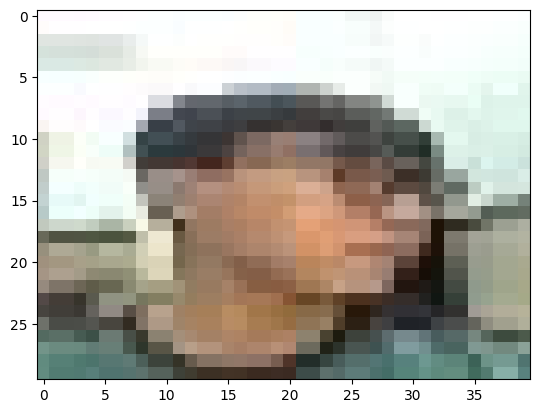

1/1 [==============================] - 0s 19ms/step
Nguyen Hoang


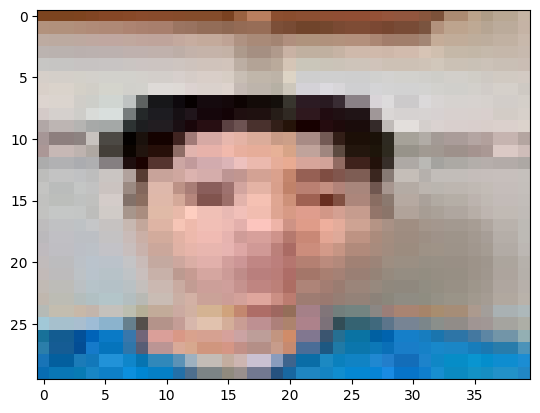

1/1 [==============================] - 0s 26ms/step
Huu Long


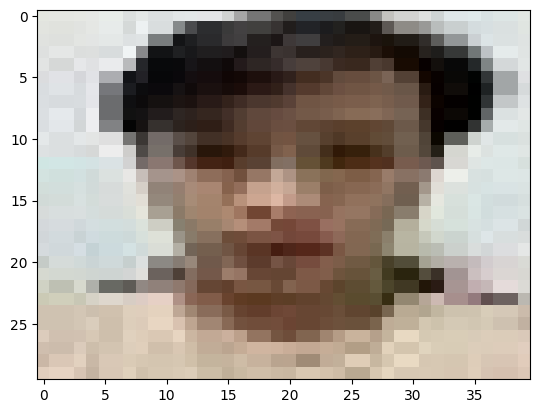

1/1 [==============================] - 0s 18ms/step
Anh Kiet


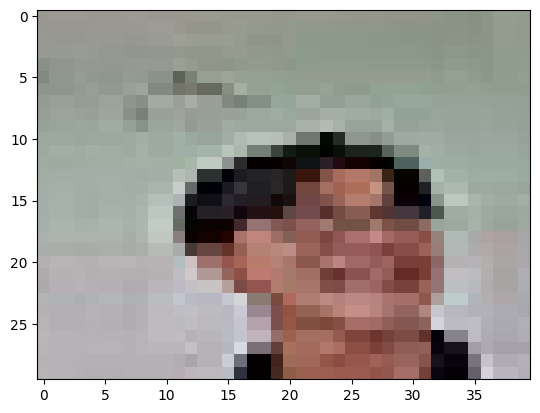

In [18]:
test="/content/drive/MyDrive/Kiemtragiuaky/FaceClass/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(30,40))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['Anh Kiet','Bao Thai','Bui Dang Khoa','Hau','Hoai Phong', 'Hoang Thanh', 'Hong Phuc', 'Huu Long', 'Minh Tien',
              'Ngoc Hieu', 'Ngoc Minh', 'Ngoc Sang', 'Ngoc Thach','Nguyen Bui Anh Kiet', 'Nguyen Hoang', 'Nguyen Tuan Kiet', 'Pham Quang Huy',
              'Phuc Dung', 'Quang Huy', 'Quang Phuc', 'Son Tung', 'Tan Dat', 'Tan Phat', 'Viet Ha']
  print(class_name[result])
  plt.show()
